# Tutorial: Getting Ready to Make an Invariant Mass Distribution

In the first tutorial we learned how to open a root file and plot branches. This provided you with the skills to plot the E, pt, pz, eta, and phi distributions of the dilepton samples. In the next part of the project we want you to use your skills and knowledge from class to discovery the Z boson by reconstructing the invariant mass distribution. Once you have the distribution you will want to perform a fit the distribution to extract some parameters about the distribution.

To help you with this, in this tutorial we will go through how to fit to a distribution. 

# Fitting to a Distribution

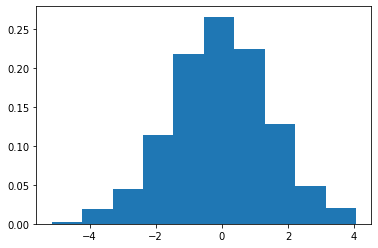

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# First let's randomly sample events from a normal, or Gaussian distribution.

# Parameters of gaussian
mu = 0
sigma = 1.5

gaussian = np.random.normal(mu, sigma, 1000)

Fitted mean and standard deviation: -0.05489137699583772, 1.471082545012795


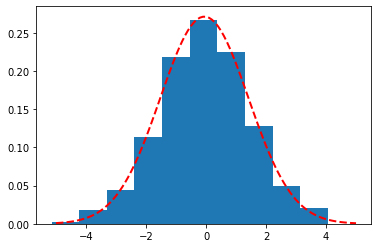

In [9]:
# Now let's plot and fit the data
n, bins, patches = plt.hist(gaussian,density=True) 
# Note: density = True normalizes the distribution to have integral = 1. 
# You may not want to do this in other cases.

# Let's then fit the data
(mu, sigma) = norm.fit(gaussian)
print("Fitted mean and standard deviation: {}, {}".format(mu,sigma))

# add a 'best fit' line
x = np.linspace(-5,5,101)
y = norm.pdf( x, mu, sigma)
l = plt.plot(x, y, 'r--', linewidth=2)

# Combining Variables

In the ROOT files we have events stored in the branches. For those variables with particle level variables, such as pT, uproot hands us the branches as jagged arrays, or arrays of unequally sized arrays. Each unequally sized array contains the particle level variables of the event. In order to plot some of the distributions, you may need to add up the momenta, for example, of two particles in the same event.

Look below to see more concretely what this means.

In [13]:
# Example of what an array from a branch could look like
pz = [[4, 3, 8], [10, 6], [12, 5, 2, 7, 9]]
# Above we see that we have 3 events. They have 3, 2 and 5 particles, respectively. 

# We will want to sum up the particle values within each event. We can use numpy's sum function within a loop to do this.
pz_summed = np.array([ np.sum(i) for i in pz ] )
print("Original branch of events and particles: {}".format(pz))
print("List of particle variables summed for each event: {}".format(pz_summed))

Original branch of events and particles: [[4, 3, 8], [10, 6], [12, 5, 2, 7, 9]]
List of particle variables summed for each event: [15 16 35]
